In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from skimage import io

In [5]:
data = pd.read_csv('data/Mall_Customers.csv')
pd.DataFrame()

""


In [13]:

data.columns = data.columns.str.strip()

In [16]:
print(data.columns.tolist())

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [26]:
# Seleksi Fitur

X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

In [17]:
# Memilih fitur
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\WAYCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\WAYCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\WAYCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\WAYCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

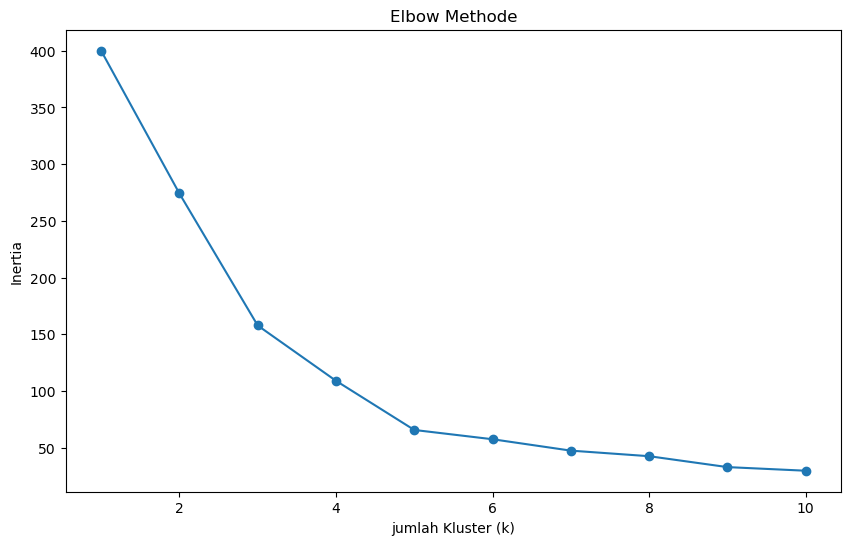

In [21]:
inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method for bes K Value')
plt.xlabel('jumlah Kluster (k)')
plt.ylabel('Inertia')
plt.show()

In [27]:
# Cek Nilai inertia setiap k
for idx, sse_val in enumerate(inertia, start=1):
    print(f'k={idx}; inertia={sse_val}')

k=1; inertia=400.00000000000006
k=2; inertia=274.0906128402976
k=3; inertia=157.7040081503594
k=4; inertia=108.92131661364358
k=5; inertia=65.56840815571681
k=6; inertia=57.38174746022784
k=7; inertia=47.33848673638823
k=8; inertia=42.42564554911967
k=9; inertia=32.81363694105777
k=10; inertia=29.618329582146515


In [28]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k,random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

c:\Users\WAYCOM\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Image segmentation SOM

In [36]:
from skimage import io
img = io.imread('Lenna.png')

# Memastikan citra dalam format yang benar
if img.ndim == 3:  # Jika citra berwarna (3 saluran warna)
    data = img.reshape(-1, 3)  # Mengubah bentuk menjadi 2D
else:
    raise ValueError("Citra harus berwarna dengan 3 saluran.")

In [31]:
data = data/255.0

TypeError: Invalid shape (0,) for image data

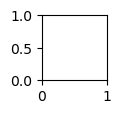

: 

In [39]:
# Membangun model SOM
som = MiniSom(x=10, y=10, input_len=3, sigma=0.5, learning_rate=0.5)
som.train(data, 100)

# Mengambil peta yang telah dilatih
win_map = som.win_map(data)

# Menampilkan hasil segmentasi
plt.figure(figsize=(10, 10))
for x in range(10):
    for y in range(10):
        plt.subplot(10, 10, x * 10 + y + 1)
        plt.imshow(win_map[(x, y)], interpolation='nearest')
        plt.axis('off')
plt.show()